In [10]:
import diffusers
from diffusers import DDPMPipeline, DDPMScheduler, UNet2DModel
from diffusers.optimization import get_scheduler
import diffusers
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionPipeline,
    UNet2DConditionModel,
)
from transformers import CLIPTextModel, CLIPTokenizer

pretrained_model_name_or_path = "CompVis/stable-diffusion-v1-4"
unet_config = UNet2DModel.load_config(
    pretrained_model_name_or_path,
    subfolder="unet",
)
# model = UNet2DModel.from_pretrained(config)
noise_scheduler = DDPMScheduler.from_pretrained(
    pretrained_model_name_or_path,
    subfolder="scheduler",
)
# text_encoder = CLIPTextModel.from_pretrained(
#     pretrained_model_name_or_path,
#     subfolder="text_encoder",
# )
# vae = AutoencoderKL.from_pretrained(
#     pretrained_model_name_or_path,
#     subfolder="vae",
# )

unet = UNet2DConditionModel.from_pretrained(
    pretrained_model_name_or_path,
    subfolder="unet",
)
unet

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [15]:
resolution = 512
UNet2DModel(
    sample_size=resolution,
    in_channels=3,
    out_channels=3,
    layers_per_block=2,
    block_out_channels=[320, 640, 1280, 1280],
    down_block_types=[
        "AttnDownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
        "DownBlock2D",
    ],
    up_block_types=[
        "UpBlock2D",
        "AttnUpBlock2D",
        "AttnUpBlock2D",
        "AttnUpBlock2D",
    ],
    attention_head_dim=8,
)

UNet2DModel(
  (conv_in): Conv2d(3, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): AttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Attention(
          (group_norm): GroupNorm(32, 320, eps=1e-05, affine=True)
          (to_q): Linear(in_features=320, out_features=320, bias=True)
          (to_k): Linear(in_features=320, out_features=320, bias=True)
          (to_v): Linear(in_features=320, out_features=320, bias=True)
          (to_out): ModuleList(
            (0): Linear(in_features=320, out_features=320, bias=True)
            (1): Dropout(p=0.0, inplace=False)
          )
        )
      )
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 320, ep

In [11]:
unet_config

{'_class_name': 'UNet2DConditionModel',
 '_diffusers_version': '0.2.2',
 'act_fn': 'silu',
 'attention_head_dim': 8,
 'block_out_channels': [320, 640, 1280, 1280],
 'center_input_sample': False,
 'cross_attention_dim': 768,
 'down_block_types': ['CrossAttnDownBlock2D',
  'CrossAttnDownBlock2D',
  'CrossAttnDownBlock2D',
  'DownBlock2D'],
 'downsample_padding': 1,
 'flip_sin_to_cos': True,
 'freq_shift': 0,
 'in_channels': 4,
 'layers_per_block': 2,
 'mid_block_scale_factor': 1,
 'norm_eps': 1e-05,
 'norm_num_groups': 32,
 'out_channels': 4,
 'sample_size': 64,
 'up_block_types': ['UpBlock2D',
  'CrossAttnUpBlock2D',
  'CrossAttnUpBlock2D',
  'CrossAttnUpBlock2D']}

## img2img pipeline

In [2]:
from datasets import load_dataset

dataset_name = "dim/nfs_pix2pix_1920_1080_v5"
dataset = load_dataset(
    dataset_name,
    cache_dir="/code/dataset/nfs_pix2pix_1920_1080_v5",
)
dataset = dataset["train"]

In [2]:
# dataset[0]["input_image"]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an e

  0%|          | 0/1 [00:00<?, ?it/s]

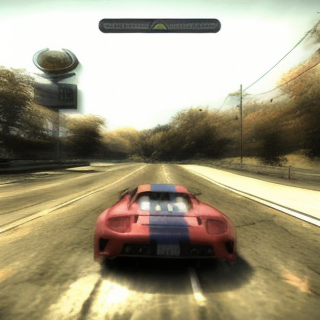

In [ ]:
import torch
from torchvision import transforms
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_id_or_path = "stablediffusionapi/juggernaut-reborn"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id_or_path, torch_dtype=torch.float16
)
pipe = pipe.to(device)


valid_transforms = transforms.Compose(
    [
        transforms.Resize(
            320,
            interpolation=transforms.InterpolationMode.LANCZOS,
        ),
        transforms.CenterCrop(320),
    ]
)
prompt = "0"
init_image = valid_transforms(dataset[400]["input_image"].convert("RGB"))
pipe(
    prompt=prompt,
    image=init_image,
    strength=1.0,
    guidance_scale=1.0,
    num_inference_steps=1,
).images[0]

In [ ]:
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionPipeline,
    UNet2DConditionModel,
    StableDiffusionImg2ImgPipeline,
    AutoencoderTiny,
)
from transformers import CLIPTextModel, CLIPTokenizer
import torch

model_name_or_path = "stabilityai/sd-turbo"
noise_scheduler = DDPMScheduler.from_pretrained(
    # model_name_or_path,
    "stabilityai/sd-turbo",
    subfolder="scheduler",
)
noise_scheduler.set_timesteps(1, device="cuda")
noise_scheduler.alphas_cumprod = noise_scheduler.alphas_cumprod.cuda()

tokenizer = CLIPTokenizer.from_pretrained(
    model_name_or_path,
    subfolder="tokenizer",
)
weight_dtype = torch.bfloat16
text_encoder = CLIPTextModel.from_pretrained(
    model_name_or_path,
    subfolder="text_encoder",
    torch_dtype=weight_dtype,
)
checkpt_path = "/code/checkpoints/auto_remaster/sd1.5_ddpm/checkpoint-300"

vae = AutoencoderTiny.from_pretrained(
    checkpt_path,
    torch_device="cuda",
    subfolder="vae",
    torch_dtype=weight_dtype,
)
# unet_path = "/code/checkpoints/sd-naruto-model/checkpoint-200/"
unet = UNet2DConditionModel.from_pretrained(
    checkpt_path,
    subfolder="unet",
    torch_dtype=weight_dtype,
)
unet.set_attention_backend("flash")

# Freeze vae and text_encoder and set unet to trainable
vae.requires_grad_(False).cuda()
text_encoder.requires_grad_(False).cuda()
unet.requires_grad_(False).cuda()
None

`torch_dtype` is deprecated! Use `dtype` instead!
The config attributes {'block_out_channels': [64, 64, 64, 64]} were passed to AutoencoderTiny, but are not expected and will be ignored. Please verify your config.json configuration file.
Attention backends are an experimental feature and the API may be subject to change.


In [2]:
from datasets import load_dataset

dataset_name = "dim/nfs_pix2pix_1920_1080_v5"
dataset = load_dataset(
    dataset_name,
    cache_dir="/code/dataset/nfs_pix2pix_1920_1080_v5",
)
dataset = dataset["train"]

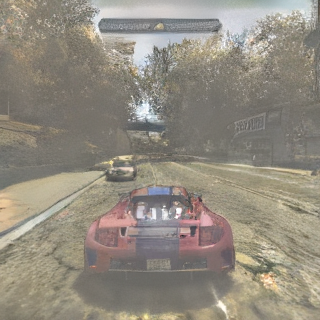

In [ ]:
import torchvision.transforms.functional as F

import torch
from torchvision import transforms

from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionPipeline,
    UNet2DConditionModel,
    StableDiffusionImg2ImgPipeline,
    AutoencoderTiny,
)
from transformers import CLIPTextModel, CLIPTokenizer
import torch

model_name_or_path = "stabilityai/sd-turbo"
noise_scheduler = DDPMScheduler.from_pretrained(
    # model_name_or_path,
    "stabilityai/sd-turbo",
    subfolder="scheduler",
)
noise_scheduler.set_timesteps(1, device="cuda")
noise_scheduler.alphas_cumprod = noise_scheduler.alphas_cumprod.cuda()

tokenizer = CLIPTokenizer.from_pretrained(
    model_name_or_path,
    subfolder="tokenizer",
)
weight_dtype = torch.bfloat16
text_encoder = CLIPTextModel.from_pretrained(
    model_name_or_path,
    subfolder="text_encoder",
    torch_dtype=weight_dtype,
)
checkpt_path = "/code/checkpoints/auto_remaster/sd1.5_ddpm/checkpoint-300"

vae = AutoencoderTiny.from_pretrained(
    checkpt_path,
    torch_device="cuda",
    subfolder="vae",
    torch_dtype=weight_dtype,
)
# unet_path = "/code/checkpoints/sd-naruto-model/checkpoint-200/"
unet = UNet2DConditionModel.from_pretrained(
    checkpt_path,
    subfolder="unet",
    torch_dtype=weight_dtype,
)
unet.set_attention_backend("flash")

# Freeze vae and text_encoder and set unet to trainable
vae.requires_grad_(False).cuda()
text_encoder.requires_grad_(False).cuda()
unet.requires_grad_(False).cuda()
None

device = "cuda"


valid_transforms = transforms.Compose(
    [
        transforms.Resize(
            320,
            interpolation=transforms.InterpolationMode.LANCZOS,
        ),
        transforms.CenterCrop(320),
    ]
)
noise_scheduler.set_timesteps(1, device="cuda")
noise_scheduler.alphas_cumprod = noise_scheduler.alphas_cumprod.cuda()

pos = 180
input_image = dataset[pos]["input_image"].convert("RGB")
prompt = dataset[0]["edit_prompt"]
target_image = valid_transforms(dataset[pos]["edited_image"].convert("RGB"))

i_t = valid_transforms(input_image)
c_t = F.to_tensor(i_t).unsqueeze(0)
c_t = c_t.cuda().to(torch.bfloat16)
timesteps = torch.tensor([999], device="cuda").long()
encoded_control = vae.encode(c_t)[0] * vae.config.scaling_factor
dummy_text = tokenizer(
    "0",
    return_tensors="pt",
).input_ids.to("cuda")
dummy_emb = text_encoder(
    dummy_text,
    return_dict=False,
)[0]

model_pred = unet(
    encoded_control,
    timesteps,
    dummy_emb,
    return_dict=False,
)[0]
# pipeline.scheduler.num_inference_steps = 0
# pipeline.scheduler.custom_timesteps = False
x_denoised = noise_scheduler.step(
    model_pred,
    timesteps,
    encoded_control,
    return_dict=False,
)[0]
output_image = (
    vae.decode(
        model_pred / vae.config.scaling_factor,
        return_dict=False,
    )[0]
).clamp(-1, 1)
# c_t.shape
# encoded_control.shape
model_pred.shape
transforms.ToPILImage()((output_image[0] * 0.5 + 0.5).float().cpu())

In [23]:
unet.device, text_encoder.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [6]:
scheduler = DDPMScheduler.from_pretrained("stabilityai/sd-turbo", subfolder="scheduler")
scheduler.set_timesteps(1, device="cuda")
scheduler.alphas_cumprod = scheduler.alphas_cumprod.cuda()

In [12]:
scheduler.alphas_cumprod.shape, scheduler.timesteps

(torch.Size([1000]), tensor([999], device='cuda:0'))

In [14]:
pipeline.scheduler.set_timesteps(1, device="cuda")

In [15]:
pipeline.scheduler.alphas_cumprod.shape, pipeline.scheduler.timesteps

(torch.Size([1000]), tensor([1], device='cuda:0'))

In [7]:
timesteps

tensor([999], device='cuda:0')

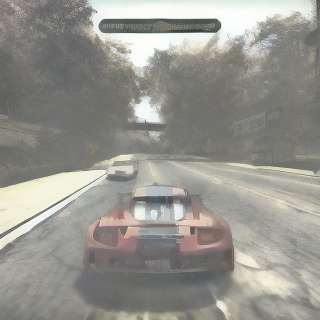

In [9]:
x_denoised = scheduler.step(
    model_pred,
    timesteps,
    encoded_control,
    return_dict=False,
)[0]
output_image = (
    vae.decode(
        model_pred / vae.config.scaling_factor,
        return_dict=False,
    )[0]
).clamp(-1, 1)
# c_t.shape
# encoded_control.shape
model_pred.shape
transforms.ToPILImage()((output_image[0] * 0.5 + 0.5).float().cpu())